### 7.1 정규표현식
#### 7.1.1 메타문자 - 정규표현식에서 일정한 의미를 가지고 있는 특수 문자

In [ ]:
# .x 또는 x. : 임의의 한 문자가 x앞이나 뒤에 오는 패턴 지정
# ^x : x로 시작하는 문자열
# x$ : x로 끝나는 문자열  
# x* : x가 0번이상 반복
# x+ : x가 1번이상 반복
# x? : x가 0개 또는 1개 존재
# abc|ABC : abc 또는 ABC 두개중 하나 선택
# [x] : x문자 한개 일치
# [^x] : x문자 제외
# x{n} : x문자 n개 연속
# x{n,} : x문자 n개 이상 연속
# x{m,n} : x문자 ㅡ~n개 사이 연속

#### 이스케이프 문자 - \(역슬래시)로 시작해서 의미를 갖는 문자

In [ ]:
# \n : 줄바꿈 문자
# \t : 탭 문자
# \w : 단어[0-9a-zA-Z_]와 같다.영문자+숫자+_
# \s : 공백문자
# \b : 문자와 공백사이
# \d : 숫자 [0-9]와 같다
# 이스케이프 문자로 해석하지 않게 하는 방법 : \(역슬래시)를 하나 더 붙이거나 문자 앞부분에 'r' 문자를 붙인다.

In [1]:
import re # 정규표현식 모듈 - 방법1
from re import findall, match, sub # - 방법2

#### 7.2 문자열 찾기
##### 1. findall('pattern', string) -> list 반환

In [3]:
st1 = '1234 abc홍길동 ABC_555_6 이사도시'

##### 1) 숫자 찾기

In [26]:
print(findall('1234', st1, flags=0)) # ['1234']

['1234']


In [5]:
print(findall('[0-9]', st1)) # ['1', '2', '3', '4', '5', '5', '5', '6']

['1', '2', '3', '4', '5', '5', '5', '6']


In [6]:
print(findall('[0-9]{3}', st1)) # {3}:숫자가 3개 연속된 패턴 ['123', '555']

['123', '555']


In [7]:
print(findall('[0-9]{3,}', st1)) # {3,}:숫자가 3개 이상 연속된 패턴 ['1234', '555']

['1234', '555']


#### 2) 문자열 찾기

In [8]:
st1 = '1234 abc홍길동 ABC_555_6 이사도시'

In [9]:
print(findall('[가-힣]{3,}', st1)) # 이름 찾기 - ['홍길동', '이사도시']

['홍길동', '이사도시']


In [10]:
print(findall('[a-z]{3}', st1)) # ['abc']

['abc']


In [11]:
print(findall('[a-z|A-Z]{3}', st1)) # ['abc', 'ABC']

['abc', 'ABC']


#### 단어에서 한글 이름 찾기

In [13]:
st_list = ['1234', 'abc홍길동', 'ABC_555_6', '이사도시']

In [14]:
st_list = st1.split()
print(st_list) # ['1234', 'abc홍길동', 'ABC_555_6', '이사도시']

['1234', 'abc홍길동', 'ABC_555_6', '이사도시']


In [15]:
names = [] # 이름 저장
for st in st_list : # 'abc홍길동'
    name = findall('[가-힣]{3,}', st) # 'abc홍길동' -> ['홍길동']

    if name : # 1개 이상 원소
        #names.append(name) # [ ['홍길동'] ] -> 중첩list
        names.append(name[0]) # ['홍길동', '이사도시']

print('names :', names) # names : ['홍길동', '이사도시']

names : ['홍길동', '이사도시']


#### 3. 문자열 찾기

In [16]:
st2 = 'test1abcABC 123mbc 45test'

In [17]:
# 접두어/접미어
print(findall('^test', st2)) # ^:접두어 - ['test']

['test']


In [19]:
print(findall('st$', st2)) # $:접미어 - ['st']

['st']


##### 종료 문자 찾기 : abc, mbc

In [21]:
print(findall('.bc', st2)) # '.bc':bc로 끝나는 3자리 문자 ['abc', 'mbc']

['abc', 'mbc']


##### 시작 문자 찾기

In [ ]:
print(findall('t.', st2)) # 't.': t로 시작되는 2자리 문자 ['te', 't1', 'te']

#### 4. 단어 찾기(\\w) - 한글,영문,숫자

In [29]:
st3 = 'test^홍길동 abc 대한*민국 123$tbc'

words = findall('\\w{3,}', st3) # '\\w{3,}:한글,영문,숫자가 3자리 이상인 문자열
print(words) # ['test', '홍길동', 'abc', '123', 'tbc']

['test', '홍길동', 'abc', '123', 'tbc']


##### 특수문자 제외

In [30]:
print(findall('[^^*$]+', st3))

['test', '홍길동 abc 대한', '민국 123', 'tbc']


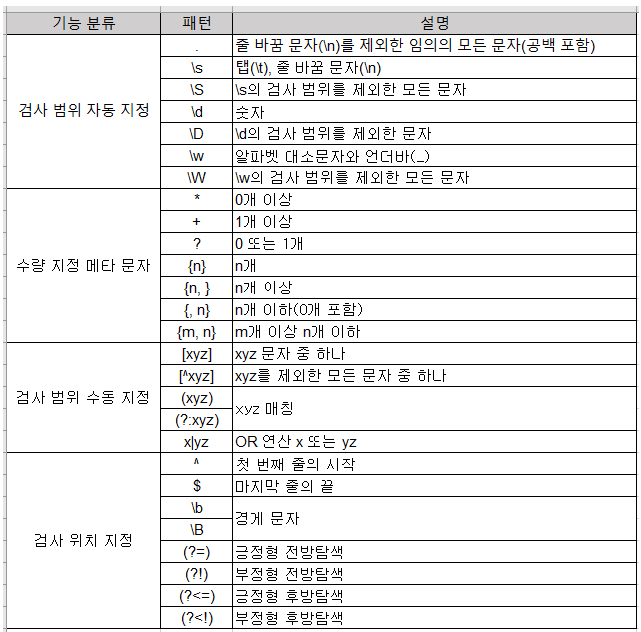